<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Optimizing_Warehouse_Logistics_with_Tree_Based_Methods_for_Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

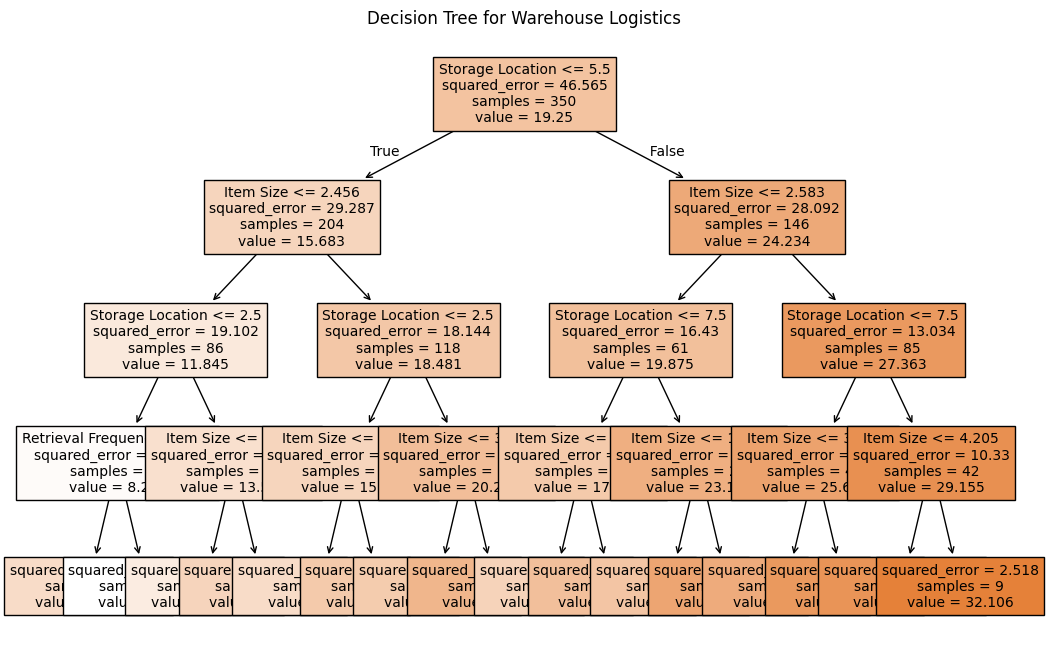

Decision Tree MSE: 9.56
Random Forest MSE: 6.10
Gradient Boosting MSE: 6.09


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data for warehouse logistics.
# I created a dataset to simulate warehouse operations, focusing on predictors like storage location, frequency of retrieval, and item size.
np.random.seed(42)  # Ensuring reproducibility
n_samples = 500

# Generating predictors
storage_location = np.random.randint(1, 10, size=n_samples)  # Storage location zones (1-10).
retrieval_frequency = np.random.randint(1, 50, size=n_samples)  # Frequency of retrieval per week.
item_size = np.random.uniform(0.5, 5.0, size=n_samples)  # Size of items in cubic meters.

# Generating response variable
retrieval_time = (
    10 / retrieval_frequency + 2 * storage_location + 3 * item_size + np.random.normal(scale=2, size=n_samples)
)
# This response variable reflects retrieval time based on the predictors with added noise.

# Creating a DataFrame for ease of use
data = pd.DataFrame({
    "Storage Location": storage_location,
    "Retrieval Frequency": retrieval_frequency,
    "Item Size": item_size,
    "Retrieval Time": retrieval_time,
})

# Step 2: Split the data into training and testing sets.
X = data[["Storage Location", "Retrieval Frequency", "Item Size"]]
y = data["Retrieval Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Fit a decision tree regressor.
# I started with a single decision tree to understand the structure of the data and its splits.
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Decision Tree for Warehouse Logistics")
plt.show()

# Step 4: Evaluate ensemble methods for improved performance.
# Bagging with Random Forests
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Boosting with Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Step 5: Compare model performance.
from sklearn.metrics import mean_squared_error

# Evaluating models
tree_mse = mean_squared_error(y_test, tree_model.predict(X_test))
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print(f"Decision Tree MSE: {tree_mse:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Gradient Boosting MSE: {gb_mse:.2f}")

# Step 6: Reflect on the results.
# The single decision tree was interpretable but less accurate compared to the ensemble methods.
# Random Forests reduced variance by averaging multiple trees, while Gradient Boosting refined predictions by correcting errors iteratively.
